In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import os

# 导入数据

In [3]:
base_dir = r'C:\Users\Administrator\Desktop\data\deep_learning\基于CNN的猫狗图片分类项目\代码\data\cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 训练集
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 验证集
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# 读取图片

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# ImageDataGenerator 图片生成器, 会自动的帮我们从指定目录中读取图片. 
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # 文件夹路径
    target_size=(64, 64),  # 指定图片缩放之后的大小
    batch_size=20,
    # 默认是categorical,表示多分类, 二分类用binary
    class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
    validation_dir, # 文件夹路径
    target_size=(64, 64),  # 指定图片缩放之后的大小
    batch_size=20,
    # 默认是categorical,表示多分类, 二分类用binary
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 搭建神经网络

In [7]:
# 搭建卷积神经网络
model = tf.keras.models.Sequential()
# 2次卷积一次池化, 3层, 2层全连接. 
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu',
                                 input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                    

# 配置网络

tf.keras.optimizers.Adam(learning_rate=0.0001)

In [9]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=['acc'])

# 训练网络

In [10]:
history = model.fit(train_generator, 
                    steps_per_epoch=100, # 2000 images : = batch_size * steps
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=50, # 1000 images = batch_size * steps
                   )

Epoch 1/20
100/100 [==============================] - 19s 183ms/step - loss: 0.6935 - acc: 0.5265 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 20s 198ms/step - loss: 0.6826 - acc: 0.5615 - val_loss: 0.6502 - val_acc: 0.6580
Epoch 3/20
100/100 [==============================] - 20s 197ms/step - loss: 0.6569 - acc: 0.6265 - val_loss: 0.6190 - val_acc: 0.6660
Epoch 4/20
100/100 [==============================] - 19s 193ms/step - loss: 0.6043 - acc: 0.6725 - val_loss: 0.6673 - val_acc: 0.6210
Epoch 5/20
100/100 [==============================] - 19s 194ms/step - loss: 0.5715 - acc: 0.7115 - val_loss: 0.6041 - val_acc: 0.6770
Epoch 6/20
100/100 [==============================] - 19s 192ms/step - loss: 0.5272 - acc: 0.7420 - val_loss: 0.5803 - val_acc: 0.6980
Epoch 7/20
100/100 [==============================] - 19s 192ms/step - loss: 0.5074 - acc: 0.7575 - val_loss: 0.5906 - val_acc: 0.6850
Epoch 8/20
100/100 [==============================] - 1

# 画图显示损失

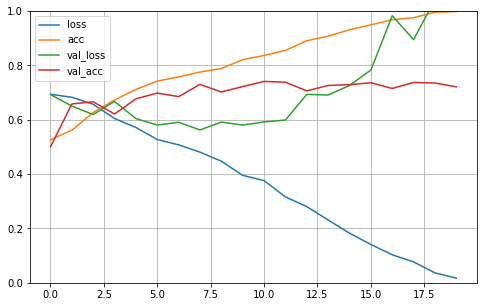

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

# 数据增强

In [12]:
# 数据增强
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40, 
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, # 文件夹路径
    target_size=(64, 64),  # 指定图片缩放之后的大小
    batch_size=20,
    # 默认是categorical,表示多分类, 二分类用binary
    class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
    validation_dir, # 文件夹路径
    target_size=(64, 64),  # 指定图片缩放之后的大小
    batch_size=20,
    # 默认是categorical,表示多分类, 二分类用binary
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
# 搭建卷积神经网络
model = tf.keras.models.Sequential()
# 2次卷积一次池化, 3层, 2层全连接. 
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu',
                                 input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=['acc'])

history = model.fit(train_generator, 
                    steps_per_epoch=100, # 2000 images : = batch_size * steps
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=50, # 1000 images = batch_size * steps
                   )

Epoch 1/20
100/100 [==============================] - 18s 179ms/step - loss: 0.6940 - acc: 0.4805 - val_loss: 0.6917 - val_acc: 0.5680
Epoch 2/20
100/100 [==============================] - 19s 193ms/step - loss: 0.6934 - acc: 0.5140 - val_loss: 0.6928 - val_acc: 0.4990
Epoch 3/20
100/100 [==============================] - 19s 191ms/step - loss: 0.6903 - acc: 0.5345 - val_loss: 0.6704 - val_acc: 0.5590
Epoch 4/20
100/100 [==============================] - 19s 192ms/step - loss: 0.6875 - acc: 0.5525 - val_loss: 0.6696 - val_acc: 0.6300
Epoch 5/20
100/100 [==============================] - 19s 191ms/step - loss: 0.6679 - acc: 0.6005 - val_loss: 0.6375 - val_acc: 0.6440
Epoch 6/20
100/100 [==============================] - 19s 193ms/step - loss: 0.6516 - acc: 0.6125 - val_loss: 0.6229 - val_acc: 0.6640
Epoch 7/20
100/100 [==============================] - 19s 191ms/step - loss: 0.6248 - acc: 0.6570 - val_loss: 0.5894 - val_acc: 0.6820
Epoch 8/20
100/100 [==============================] - 2

# 可以接着上次的继续跑

In [15]:
history = model.fit(train_generator, 
                    steps_per_epoch=100, # 2000 images : = batch_size * steps
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=50, # 1000 images = batch_size * steps
                   )

Epoch 1/20
100/100 [==============================] - 17s 174ms/step - loss: 0.5041 - acc: 0.7455 - val_loss: 0.5259 - val_acc: 0.7200
Epoch 2/20
100/100 [==============================] - 20s 202ms/step - loss: 0.5026 - acc: 0.7585 - val_loss: 0.5461 - val_acc: 0.7320
Epoch 3/20
100/100 [==============================] - 19s 194ms/step - loss: 0.5108 - acc: 0.7545 - val_loss: 0.5108 - val_acc: 0.7430
Epoch 4/20
100/100 [==============================] - 19s 191ms/step - loss: 0.5065 - acc: 0.7480 - val_loss: 0.4953 - val_acc: 0.7480
Epoch 5/20
100/100 [==============================] - 19s 193ms/step - loss: 0.4812 - acc: 0.7665 - val_loss: 0.5085 - val_acc: 0.7510
Epoch 6/20
100/100 [==============================] - 19s 191ms/step - loss: 0.4839 - acc: 0.7775 - val_loss: 0.4980 - val_acc: 0.7590
Epoch 7/20
100/100 [==============================] - 19s 191ms/step - loss: 0.4916 - acc: 0.7645 - val_loss: 0.5022 - val_acc: 0.7480
Epoch 8/20
100/100 [==============================] - 1